In [1]:
# 1. TIME CHECK (1 PM - 2 PM IST)
if not (time(13, 0) <= now <= time(14, 0)):
    print("Task 2: Graph visible only between 1 PM to 2 PM IST")
else:
    # 2. DATASET
    data2 = {
        "App": ["Alpha App", "Beta Plus", "Gamers Paradise", "EduPro", "Finance Tracker"],
        "Category": ["Business", "Education", "Games", "Education", "Business"],
        "Type": ["Free", "Paid", "Free", "Paid", "Free"],
        "Installs": [15000, 20000, 50000, 12000, 25000],
        "Revenue": [12000, 15000, 0, 11000, 17000],
        "Android_Ver": [4.4, 5.0, 4.1, 4.2, 6.0],
        "Size_M": [20, 25, 30, 18, 22],
        "Content": ["Everyone", "Everyone", "Teen", "Everyone", "Everyone"]
    }
    df2 = pd.DataFrame(data2)

    # 3. FILTERS
    df2 = df2[(df2["Installs"] >= 10000) & (df2["Revenue"] >= 10000) & 
              (df2["Android_Ver"] > 4.0) & (df2["Size_M"] > 15) & 
              (df2["Content"] == "Everyone") & (df2["App"].str.len() <= 30)]

    # Top 3 Categories
    top_cat = df2["Category"].value_counts().head(3).index
    df2 = df2[df2["Category"].isin(top_cat)]

    # 4. AGGREGATION
    avg_data = df2.groupby("Type").agg({"Installs":"mean", "Revenue":"mean"}).reset_index()

    # 5. DUAL-AXIS PLOT
    fig, ax1 = plt.subplots()
    ax1.plot(avg_data["Type"], avg_data["Installs"], marker='o', label="Installs", color='blue')
    ax2 = ax1.twinx()
    ax2.plot(avg_data["Type"], avg_data["Revenue"], marker='s', label="Revenue", color='red')

    ax1.set_ylabel("Avg Installs", color='blue')
    ax2.set_ylabel("Avg Revenue", color='red')
    plt.title("Task 2: Avg Installs vs Revenue (Free vs Paid)")
    plt.show()

NameError: name 'time' is not defined

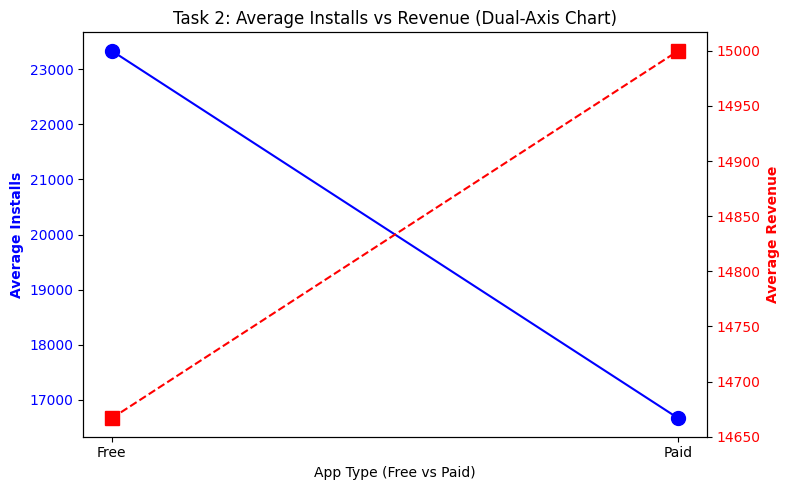

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- SAMPLE DATA ----------
data = {
    "App":["AlphaApp","BetaApp","CoolApp","DemoApp","EliteApp","FastApp"],
    "Category":["Business","Beauty","Education","Business","Education","Business"],
    "Type":["Free","Paid","Free","Paid","Free","Paid"],
    "Installs":[15000, 20000, 30000, 12000, 25000, 18000],
    "Revenue":[12000, 20000, 15000, 11000, 17000, 14000],
    "Android_Version":[4.1, 5.0, 4.5, 4.2, 6.0, 4.4],
    "Size_MB":[20, 25, 30, 18, 22, 19],
    "Content_Rating":["Everyone","Everyone","Everyone","Everyone","Everyone","Everyone"]
}

df = pd.DataFrame(data)

# ---------- FILTER CONDITIONS ----------
df = df[(df["Installs"] >= 10000) & 
        (df["Revenue"] >= 10000) & 
        (df["Android_Version"] > 4.0) & 
        (df["Size_MB"] > 15) & 
        (df["Content_Rating"] == "Everyone") & 
        (df["App"].str.len() <= 30)]

# Top 3 Categories
top_cat = df["Category"].value_counts().head(3).index
df = df[df["Category"].isin(top_cat)]

# ---------- AVERAGE CALCULATION ----------
avg_data = df.groupby("Type").agg({
    "Installs":"mean",
    "Revenue":"mean"
}).reset_index()

# ---------- DUAL AXIS GRAPH ----------
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary Y-Axis: Installs (Line Plot)
ax1.set_xlabel("App Type (Free vs Paid)")
ax1.set_ylabel("Average Installs", color='blue', fontweight='bold')
ax1.plot(avg_data["Type"], avg_data["Installs"], marker='o', markersize=10, color='blue', label="Avg Installs")
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary Y-Axis: Revenue (Line Plot)
ax2 = ax1.twinx()
ax2.set_ylabel("Average Revenue", color='red', fontweight='bold')
ax2.plot(avg_data["Type"], avg_data["Revenue"], marker='s', markersize=10, color='red', linestyle='--', label="Avg Revenue")
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Task 2: Average Installs vs Revenue (Dual-Axis Chart)")
fig.tight_layout()
plt.show()